In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from sklearn import preprocessing

2022-10-06 12:23:03.121934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-06 12:23:03.224235: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-06 12:23:03.635393: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64
2022-10-06 12:23:03.635446: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerr

In [12]:
data = pd.read_csv('train.csv')
activity_to_label = {
    'WALKING_HORIZONTALLY':0,
    'WALKING_UPSTAIRS':1,
    'WALKING_DOWNSTAIRS':2,
    'SITTING':3,
    'STANDING':4,
    'LAYING':5
}
x_train = np.array((np.array(data)[:,:-3]+1)/2,dtype = np.float32).reshape(-1,70,8)
y_train = np.array(data)[:,-1]
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()
y_train = np.array(label_encoder.fit_transform(y_train))
y_train = tf.one_hot(y_train,depth = 6)

In [13]:
columns = data.columns

In [14]:
y_train[:10]

<tf.Tensor: shape=(10, 6), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [15]:
x_train.shape

(7352, 70, 8)

In [16]:
x_train[0]

array([[6.44292235e-01, 4.89852905e-01, 4.33547437e-01, 2.36069993e-03,
        8.44469480e-03, 4.32367735e-02, 2.44395994e-03, 8.40771478e-03],
       [3.82364914e-02, 3.26381102e-02, 2.16310963e-01, 1.27793729e-01,
        9.26473677e-01, 8.42922270e-01, 9.07131374e-01, 1.72386058e-02],
       [2.76749997e-05, 6.84850020e-05, 2.69390992e-03, 2.88459496e-03,
        6.19303994e-03, 2.83900052e-02, 2.96126455e-01, 1.60331249e-01],
       [1.98939070e-01, 9.64646757e-01, 7.34944269e-02, 6.79954886e-01,
        4.70736802e-01, 6.28445745e-01, 3.87576193e-01, 6.32052839e-01],
       [4.52377170e-01, 6.39425695e-01, 2.67457724e-01, 7.45967984e-01,
        4.04558212e-01, 6.88156962e-01, 7.17564583e-01, 8.30395162e-01],
       [9.81698096e-01, 4.29580152e-01, 5.57687461e-01, 7.37515511e-03,
        9.14578512e-03, 6.11875132e-02, 7.49931484e-03, 7.79188983e-03],
       [5.26613258e-02, 9.46027279e-01, 4.19367254e-01, 5.62329888e-01,
        9.88718152e-01, 4.38393295e-01, 5.28241396e-01, 3.

In [12]:
val = x_train[0]
print(min(x_train[0].flatten()),max(x_train[0].flatten()))

0.0 1.0


In [15]:
img = np.array(x_train[0]*255,dtype = np.uint8)
img.shape

(70, 8)

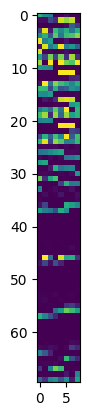

In [14]:
plt.imshow(img)